In [21]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn import preprocessing


In [22]:
# In[2]:

data=pd.read_csv("C:\\Users\\HP\\Documents\\RainfallPrediction-master\\RainfallPrediction-master\\rainfaLLIndia.csv")
print("Data heads:")
print(data.head())
print("Null values in the dataset before preprocessing:")
print(data.isnull().sum())
print("Filling null values with mean of that particular column")
data=data.fillna(np.mean(data))
print("Mean of data:")
print(np.mean(data))
print("Null values in the dataset after preprocessing:")
print(data.isnull().sum())
print("\n\nShape: ",data.shape)




Data heads:
                subdivision  YEAR    JUN    JUL    AUG    SEP  JUN-SEP
0  ANDAMAN & NICOBAR ISLAND  1901  517.5  365.1  481.1  332.6   1696.3
1  ANDAMAN & NICOBAR ISLAND  1902  537.1  228.9  753.7  666.2   2185.9
2  ANDAMAN & NICOBAR ISLAND  1903  479.9  728.4  326.7  339.0   1874.0
3  ANDAMAN & NICOBAR ISLAND  1904  495.1  502.0  160.1  820.4   1977.6
4  ANDAMAN & NICOBAR ISLAND  1905  628.7  368.7  330.5  297.0   1624.9
Null values in the dataset before preprocessing:
subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP        0
dtype: int64
Filling null values with mean of that particular column
Mean of data:
YEAR       1961.224377
JUN         227.582410
JUL         344.361657
AUG         288.907018
SEP         197.399931
JUN-SEP    1057.105217
dtype: float64
Null values in the dataset after preprocessing:
subdivision    0
YEAR           0
JUN            0
JUL            0
AUG            0
SEP            0
JUN-SEP 

C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [23]:
# In[3]:


print ("Info")
print(data.info())


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   subdivision  4332 non-null   object 
 1   YEAR         4332 non-null   int64  
 2   JUN          4332 non-null   float64
 3   JUL          4332 non-null   float64
 4   AUG          4332 non-null   float64
 5   SEP          4332 non-null   float64
 6   JUN-SEP      4332 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 237.0+ KB
None


In [24]:
# In[4]:


data.head()


# In[5]:






,subdivision,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
0,ANDAMAN & NICOBAR ISLAND,1901,517.5,365.1,481.1,332.6,1696.3
1,ANDAMAN & NICOBAR ISLAND,1902,537.1,228.9,753.7,666.2,2185.9
2,ANDAMAN & NICOBAR ISLAND,1903,479.9,728.4,326.7,339.0,1874.0
3,ANDAMAN & NICOBAR ISLAND,1904,495.1,502.0,160.1,820.4,1977.6
4,ANDAMAN & NICOBAR ISLAND,1905,628.7,368.7,330.5,297.0,1624.9


In [25]:
data.describe()

,YEAR,JUN,JUL,AUG,SEP,JUN-SEP
count,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000,4332.000000
mean,1961.224377,227.582410,344.361657,288.907018,197.399931,1057.105217
std,34.869503,232.087633,268.229923,189.930239,136.681781,706.555790
min,1901.000000,-99.900000,-99.900000,-99.900000,-99.900000,-99.900000
25%,1931.000000,70.400000,173.875000,155.000000,99.875000,565.925000
50%,1961.000000,137.650000,283.250000,258.000000,172.900000,877.300000
75%,1991.000000,303.725000,416.175000,377.625000,266.500000,1287.900000
max,2021.000000,1609.900000,2362.800000,1664.600000,1222.000000,4536.900000


array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JUN'}>],
       [<AxesSubplot:title={'center':'JUL'}>,
        <AxesSubplot:title={'center':'AUG'}>],
       [<AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'JUN-SEP'}>]], dtype=object)

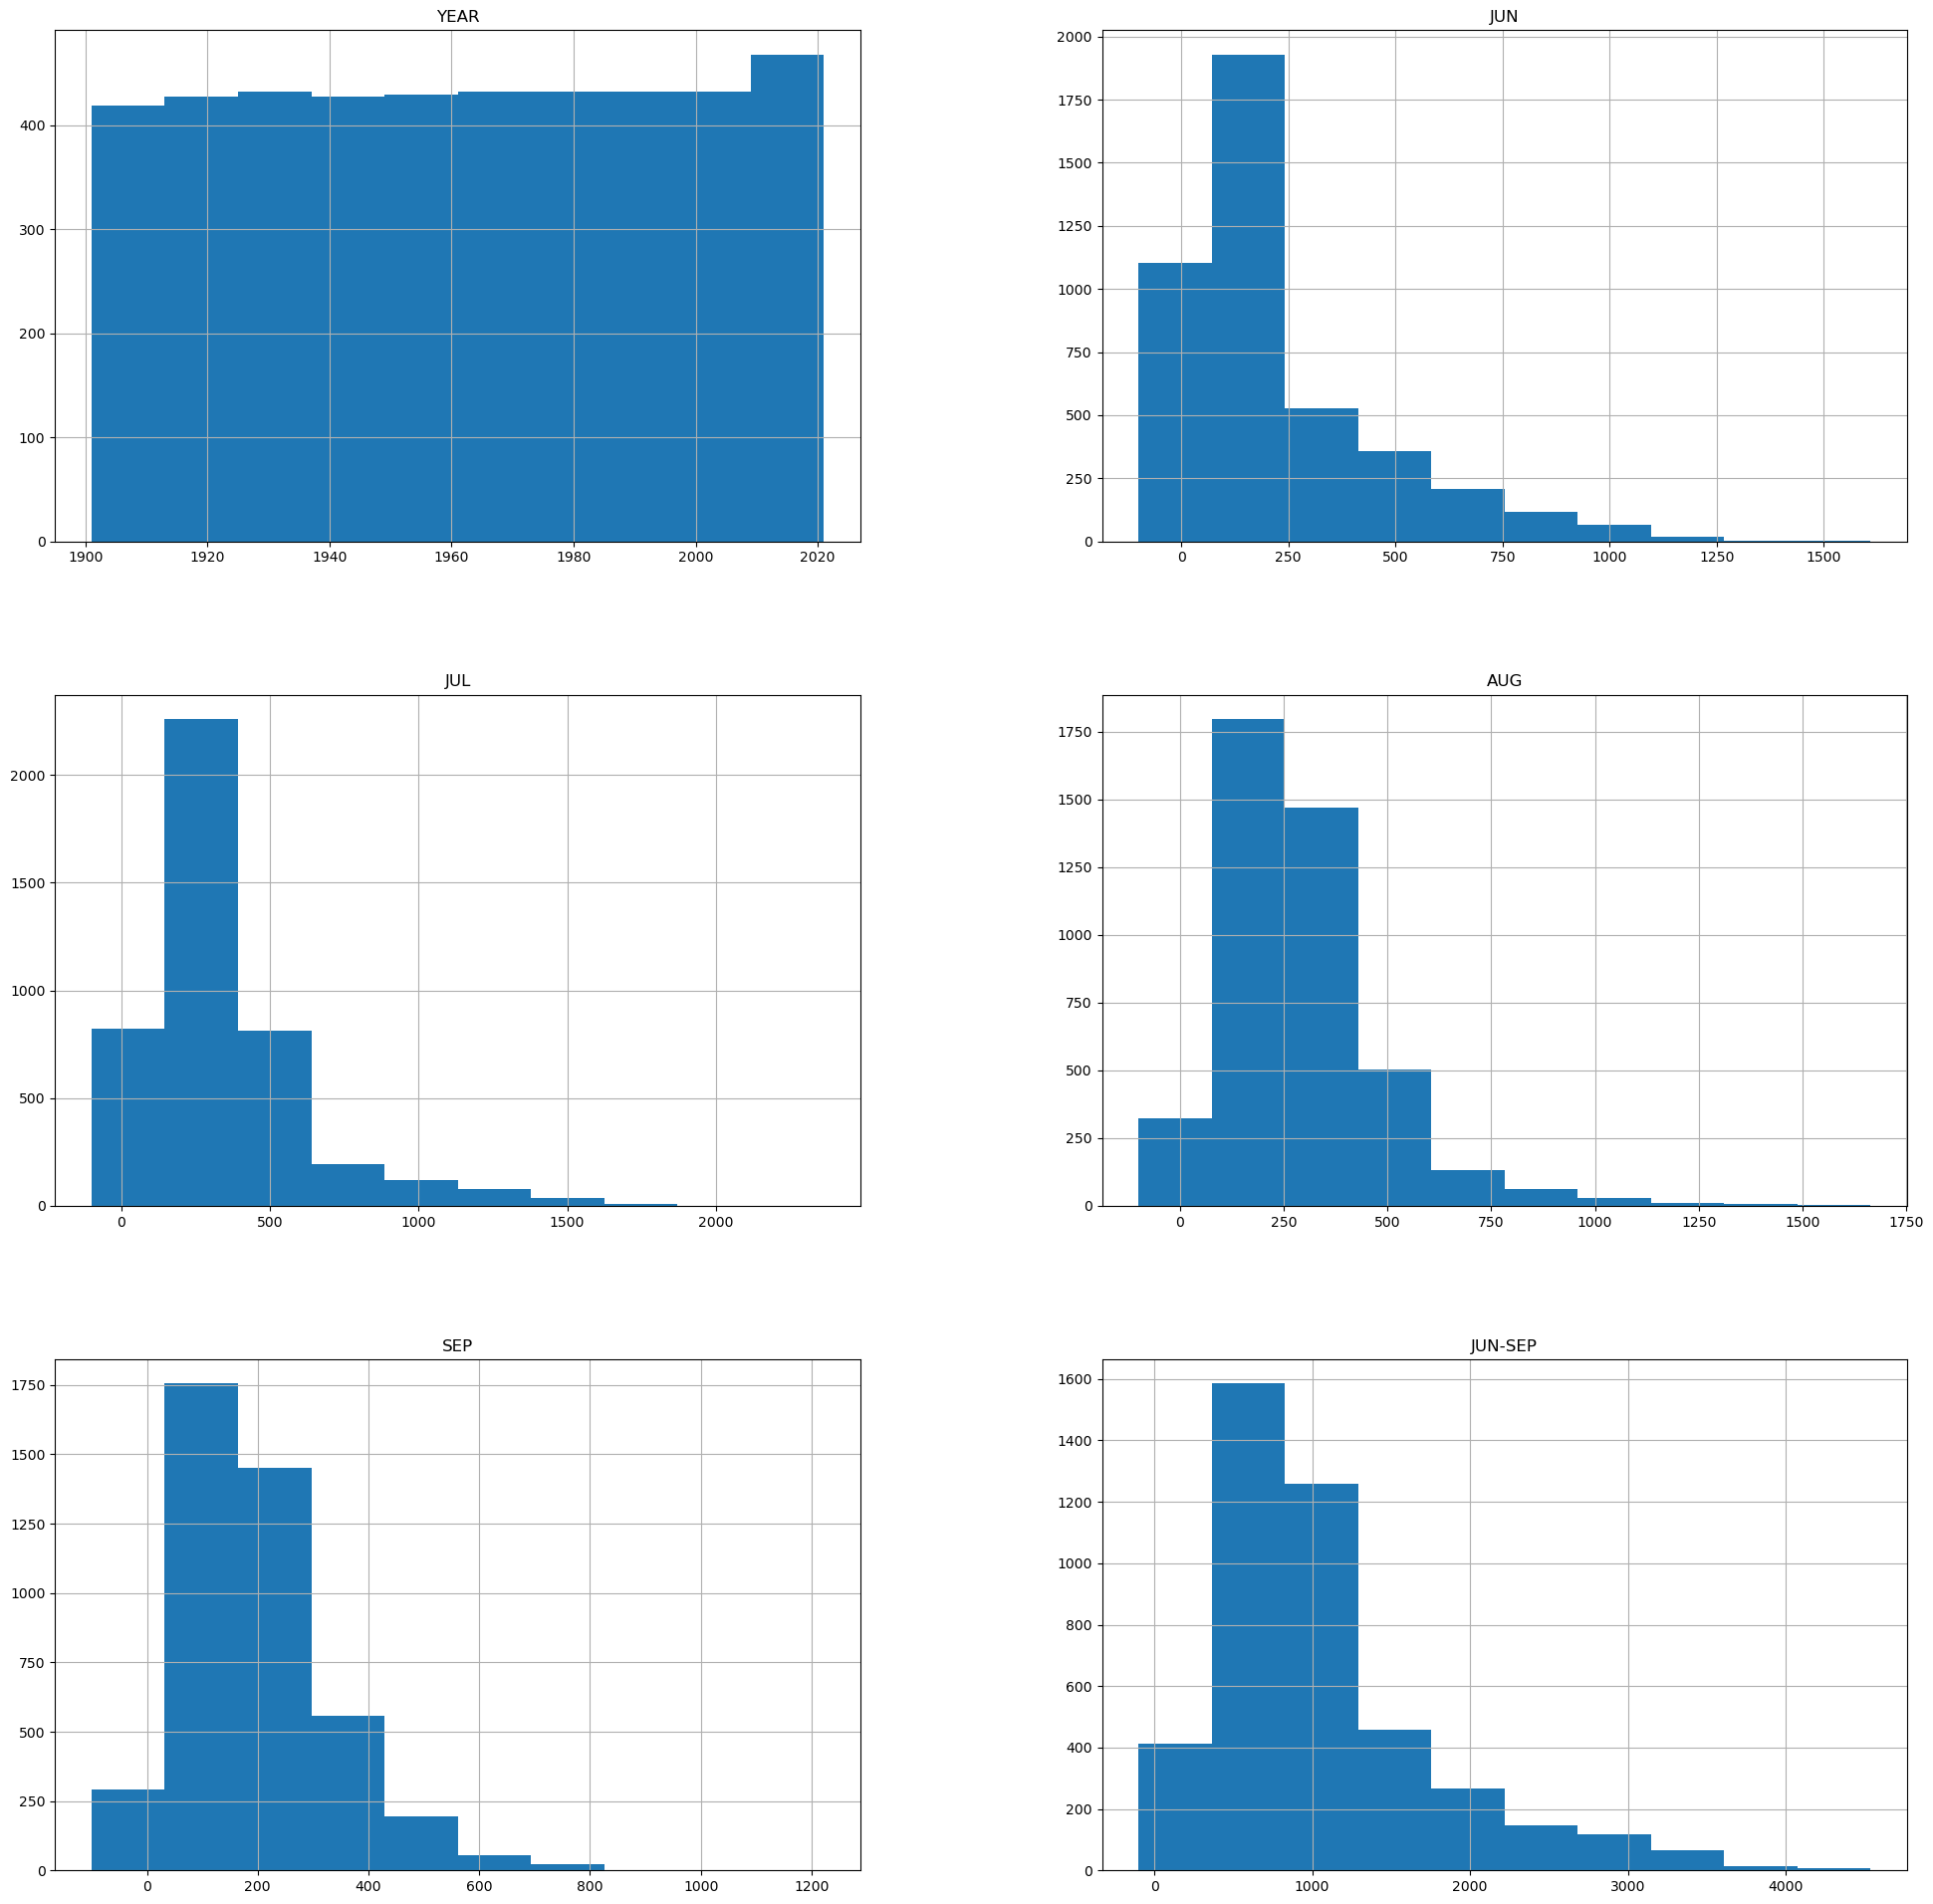

In [26]:

data.hist(figsize=(24,24))

In [27]:
# seperation of training and testing data 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
division_data = np.asarray(data[['JUN', 'JUL', 'AUG', 'SEP','JUN-SEP']])
X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3] 
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0) 
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



Annual rainfall from Year 1901 to 2021


<AxesSubplot:xlabel='YEAR'>

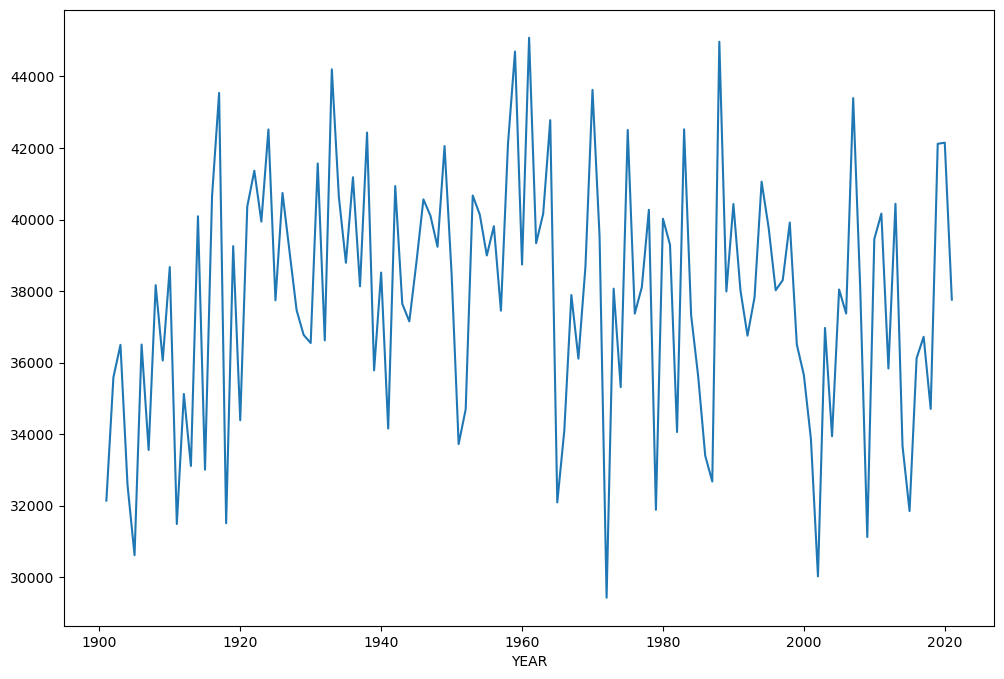

In [28]:
# In[7]:

print("Annual rainfall from Year 1901 to 2021")
data.groupby("YEAR").sum()['JUN-SEP'].plot(figsize=(12,8))


In [29]:
# seperation of training and testing data 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error
division_data = np.asarray(data[['JUN', 'JUL', 'AUG', 'SEP', 'JUN-SEP']])
X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3] 
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0) 
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [30]:
#test 2023
temp = data[['subdivision','JUN', 'JUL', 'AUG', 'SEP', 'JUN-SEP']].loc[data['YEAR'] == 2021]
data_2023 = np.asarray(temp[[ 'JUN', 'JUL', 'AUG', 'SEP']])

X_year_2023 = None; y_year_2023 = None 
for i in range(data_2023.shape[1]-3): 
    if X_year_2023 is None: 
        X_year_2023 = data_2023[:, i:i+3] 
        y_year_2023 = data_2023[:, i+3] 
    else: 
        X_year_2023 = np.concatenate((X_year_2023, data_2023[:, i:i+3]), axis=0) 
        y_year_2023 = np.concatenate((y_year_2023, data_2023[:, i+3]), axis=0)

In [31]:
from sklearn import linear_model
# linear model 
reg = linear_model.ElasticNet(alpha=0.5) 
reg.fit(X_train, y_train) 
y_pred = reg.predict(X_test) 
print(mean_absolute_error(y_test, y_pred))

317.0322072225197


In [32]:
y_pred

array([ 152.10121877,  455.81078776, 1159.57128358,   68.32559604,
        237.48882058,  462.18577264, 1093.16547522, 1137.02224511,
        280.11761045,  104.14771769,  481.54466197,  425.87602175,
        687.34544836,  302.64276537,  883.15761737,  258.13719523,
        775.28331124,  233.51108548,  193.83228635,  204.25964736,
        258.98002159,  743.09013515,  241.43544759,  597.28748535,
         97.79896261,  303.68337829, 1125.12631275,  487.12732366,
        451.40724872, 1056.32516307,  156.46203461,  689.18438105,
        450.75176827,  834.63617519, 1074.62419718,  201.63896516,
        335.31571192,  386.48968096,  149.78849269, 1273.27544363,
        415.02190702,  421.56370723,  342.05532386,  344.370886  ,
        997.19187685,  967.57335779,  857.39229885,  361.88299211,
        163.582768  ,  972.13640153, 1258.49005144,  727.00155967,
        943.37256509,  627.41172885,  249.8626658 ,  236.48666441,
        690.21863349,  104.39837665,  441.58399676,  669.11803

In [40]:
if y_pred.all() <100:
    print("Less rainfall")
elif y_pred.all() > 100 & y_pred.all()<200 :
    print("Medium rainfall")
else: 
   print("Heavy rainfall")

Less rainfall


In [34]:
y_pred[40]

415.0219070164833